# Initialize

In [1]:
%cd ".."
# %cd /mnt/project_mnt/teo_fs/rtorre/cernbox/git/GitHub/NormalizingFlows/NF4HEP/GenerativeModelsMetrics

/leonardo_scratch/fast/INF24_pmlhep_1/sgrossi0/projects/TwoSampleTest/NPLMMetrics


/leonardo_scratch/fast/INF24_pmlhep_1/envs/tf2_custom_torch2.2/lib/python3.11/site-packages/IPython/core/magics/osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [2]:
visible_devices = [0]
from datetime import datetime
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing os...")
import os
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing sys...")
import sys
if not any("ipykernel" in arg for arg in sys.argv):
    print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing and initializing argparse...")
    import argparse
    parser = argparse.ArgumentParser()
    parser.add_argument("-v", "--visible_devices", help="Set visible devices", nargs='*', type=list, default=visible_devices)
    args = parser.parse_args()
    visible_devices = args.visible_devices if args.visible_devices else visible_devices
    if not isinstance(visible_devices, list):
        raise ValueError("Visible devices must be a list of integers")
    for i in visible_devices:
        if not isinstance(i, int):
            raise ValueError("Visible devices must be a list of integers")
print("Visible devices:", visible_devices)
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing timer from timeit...")
from timeit import default_timer as timer
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Setting env variables for tf import (only device(s)", visible_devices, "will be available)...")
os.environ["CUDA_VISIBLE_DEVICES"] = ','.join([str(i) for i in visible_devices]) # type: ignore
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
#os.environ['TF_XLA_FLAGS'] = '--tf_xla_enable_xla_devices'
#os.environ['TF_XLA_FLAGS'] = '--tf_xla_auto_jit=2'
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing numpy...")
import numpy as np # type: ignore
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing matplotlib...")
from matplotlib import pyplot as plt
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing h5py...")
import h5py # type: ignore
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing importlib.util...")
import importlib.util
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing json...")
import json
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing pandas...")
import pandas as pd
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing random...")
import random
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing scipy utils...")
from scipy.stats import norm, lognorm, chi2, kstwo, kstwobign, ks_2samp, moment
from scipy.special import kolmogorov
from scipy.optimize import minimize, curve_fit, root, bisect
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing subprocess...")
import subprocess
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing tensorflow...")
import tensorflow as tf # type: ignore
print("Tensorflow version:", tf.__version__)
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing tensorflow_probability...")
import tensorflow_probability as tfp # type: ignore
tfd = tfp.distributions
print("Tensorflow probability version:", tfp.__version__)
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing timeit...")
from timeit import default_timer as timer
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing tqdm...")
from tqdm import tqdm
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing typing...")
from typing import List, Tuple, Dict, Callable, Union, Optional, Any, Type
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Setting tf configs...")
gpu_devices = tf.config.experimental.list_physical_devices('GPU')
for gpu_device in gpu_devices:
    tf.config.experimental.set_memory_growth(gpu_device, True)

print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing GMetrics module...")

import GMetrics # type: ignore
from GMetrics.plotters import plot_corners, cornerplotter, plot_corr_matrix, plot_corr_matrix_side_by_side # type: ignore
from GMetrics.more import MixtureDistributions # type: ignore
from GMetrics.more import deformations # type: ignore
from GMetrics.more.optimizers_deformations import compute_exclusion_bisection, compute_exclusion_LR_bisection # type: ignore
from GMetrics.utils import se_mean, se_std

print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing jetnet.evaluation.gen_metrics module...")
from jetnet.evaluation import gen_metrics as JMetrics # type: ignore

def get_gpu_info():
    try:
        gpu_info = subprocess.check_output(["nvidia-smi", "--query-gpu=gpu_name", "--format=csv,noheader"]).decode('utf-8')
        return gpu_info.strip().split('\n')
    except Exception as e:
        print(e)
        return None
training_devices = []
gpu_models = get_gpu_info()
for i in visible_devices:
    if gpu_models:
        training_devices.append(gpu_models[i])
        print(f"Successfully loaded GPU #{i}, model: {gpu_models[i]}")
    else:
        training_devices.append('undetermined')
        print(f"Failed to load GPU {i} model. Defaulting to 'undetermined'.")
print(f"Loaded {len(training_devices)} GPUs: {training_devices}")
    
results_dir = "results/5D_unimodal/"
if os.path.exists(results_dir):
    print("Model directory exists")
else:
    os.makedirs(results_dir)
    print("Model directory was created")
    
    
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "All done.")

2024-11-27 08:44:44.859553: Importing os...
2024-11-27 08:44:44.859685: Importing sys...
Visible devices: [0]
2024-11-27 08:44:44.859918: Importing timer from timeit...
2024-11-27 08:44:44.859994: Setting env variables for tf import (only device(s) [0] will be available)...
2024-11-27 08:44:44.860120: Importing numpy...
2024-11-27 08:44:45.269790: Importing matplotlib...
2024-11-27 08:44:45.767613: Importing h5py...
2024-11-27 08:44:46.004527: Importing importlib.util...
2024-11-27 08:44:46.004652: Importing json...
2024-11-27 08:44:46.004718: Importing pandas...
2024-11-27 08:44:47.297323: Importing random...
2024-11-27 08:44:47.297509: Importing scipy utils...
2024-11-27 08:44:48.316818: Importing subprocess...
2024-11-27 08:44:48.316957: Importing tensorflow...
Tensorflow version: 2.16.1
2024-11-27 08:44:58.589057: Importing tensorflow_probability...
Tensorflow probability version: 0.24.0
2024-11-27 08:45:00.335351: Importing timeit...
2024-11-27 08:45:00.335443: Importing tqdm...
2

/leonardo_scratch/fast/INF24_pmlhep_1/envs/tf2_custom_torch2.2/lib/python3.11/site-packages/jetnet/utils/utils.py:7: FutureWarning: In version 2024.7.0 (target date: 2024-06-30 11:59:59-05:00), this will be an error.
To raise these warnings as errors (and get stack traces to find out where they're called), run
    import warnings
    warnings.filterwarnings("error", module="coffea.*")
after the first `import coffea` or use `@pytest.mark.filterwarnings("error:::coffea.*")` in pytest.
Issue: coffea.nanoevents.methods.vector will be removed and replaced with scikit-hep vector. Nanoevents schemas internal to coffea will be migrated. Otherwise please consider using that package!.
  from coffea.nanoevents.methods import vector


2024-11-27 08:45:13.982288: Importing jetnet.evaluation.gen_metrics module...
Successfully loaded GPU #0, model: NVIDIA A100-SXM-64GB
Loaded 1 GPUs: ['NVIDIA A100-SXM-64GB']
Model directory exists
2024-11-27 08:45:13.999120: All done.


# Model definition

In [3]:
import json

ndims = 5
batch_size_test = 100_000

# Path to the other metrics results file
path_other_metrics_results =path_other_metrics_results = "/leonardo_scratch/fast/INF24_pmlhep_1/rtorre00/projects/GenerativeModelsMetrics/results/" + str(ndims) + "D_unimodal/" + str(ndims) + "D_" + str(int(batch_size_test/1000)) + "K/exclusion_limits.json"

# Dictionary to store epsilon values for each deformation with 'swd' metric at 0.99 CL
epsilon_swd_values = {}

with open(path_other_metrics_results, 'r') as file:
    other_metrics_results = json.load(file)

# Iterate over the metrics and find epsilon values for 'swd' at 0.99 confidence level in 'central' bound
for key, value in other_metrics_results.items():
    deformation = value.get("deformation", "unknown")
    bound = value.get("bound", "unknown")
    exclusion_list = value.get("exclusion_list", [])
    metric_name = value.get("name")

    # Only consider the 'central' bound and metric name 'swd'
    if bound == "central" and metric_name == "swd":
        for entry in exclusion_list:
            if isinstance(entry, list) and entry[0] == 0.99:  # Check 99% CL
                epsilon_value = entry[3]  # Epsilon value is at index 3
                epsilon_swd_values[deformation] = epsilon_value

print("Epsilon values for the 'swd' metric in the 'central' bound (0.99 confidence level):")
for deformation, epsilon in epsilon_swd_values.items():
    print(f"  {deformation}: {epsilon}")

# Order the results as in tables: mean, cov_diag, cov_off_diag, pow_abs_up, pow_abs_down, random_normal, random_uniform
mean_eps = round(epsilon_swd_values.get("mean"), 4)
cov_diag_eps = round(epsilon_swd_values.get("cov_diag"), 4)
cov_off_diag_eps = round(epsilon_swd_values.get("cov_off_diag"), 4)
power_abs_up_eps = round(epsilon_swd_values.get("power_abs_up"), 4)
power_abs_down_eps = round(epsilon_swd_values.get("power_abs_down"), 4)
random_normal_eps = round(epsilon_swd_values.get("random_normal"), 4)
random_uniform_eps = round(epsilon_swd_values.get("random_uniform"), 4)

input_values = [
    mean_eps,
    cov_diag_eps,
    cov_off_diag_eps,
    power_abs_up_eps,
    power_abs_down_eps,
    random_normal_eps,
    random_uniform_eps,
]

print(input_values)


Epsilon values for the 'swd' metric in the 'central' bound (0.99 confidence level):
  cov_diag: 0.01669595871218732
  cov_off_diag: 0.03800484636587953
  mean: 0.040397784378498613
  power_abs_down: 0.004109664478164632
  power_abs_up: 0.004208601104468412
  random_normal: 0.25369196048814047
  random_uniform: 0.4399828148416418
[0.0404, 0.0167, 0.038, 0.0042, 0.0041, 0.2537, 0.44]


In [4]:
seed = 0
ncomp = 3
ndims = 5
niter = 10_000
dist_1 = MixtureDistributions.MultiNormalFromMix(ncomp = ncomp,
                                                 ndims = ndims,
                                                 loc_factor = 5.,
                                                 scale_factor = 1.,
                                                 dtype = tf.float64,
                                                 seed = seed)
dist_2 = MixtureDistributions.MultiNormalFromMix(ncomp = ncomp,
                                                 ndims = ndims,
                                                 loc_factor = 5.,
                                                 scale_factor = 1.,
                                                 dtype = tf.float64,
                                                 seed = seed)
print(dist_1.dtype, dist_2.dtype)
print('Types of distributions: ', type(dist_1), type(dist_2))
print('Dtypes of distributions: ', dist_1.dtype, dist_2.dtype)
print('Batch shapes of distributions: ', dist_1.batch_shape, dist_2.batch_shape)
print('Event shapes of distributions: ', dist_1.event_shape, dist_2.event_shape)
GMetrics.utils.reset_random_seeds(seed)
print('sample from dist_1: ', dist_1.sample(2))
GMetrics.utils.reset_random_seeds(seed)
print('sample from dist_2: ', dist_2.sample(2))

<dtype: 'float64'> <dtype: 'float64'>
Types of distributions:  <class 'tensorflow_probability.python.distributions.mvn_tril.MultivariateNormalTriL'> <class 'tensorflow_probability.python.distributions.mvn_tril.MultivariateNormalTriL'>
Dtypes of distributions:  <dtype: 'float64'> <dtype: 'float64'>
Batch shapes of distributions:  () ()
Event shapes of distributions:  (5,) (5,)
sample from dist_1:  tf.Tensor(
[[ 1.16219879 -2.23355877 -2.20074354  5.13001852  1.32076395]
 [-2.52951149 -0.85963791 -1.86490016  1.34132483 -0.66278098]], shape=(2, 5), dtype=float64)
sample from dist_2:  tf.Tensor(
[[ 1.16219879 -2.23355877 -2.20074354  5.13001852  1.32076395]
 [-2.52951149 -0.85963791 -1.86490016  1.34132483 -0.66278098]], shape=(2, 5), dtype=float64)


## Deformations

### 1 - $\mu$-deformation

In [5]:
eps = input_values[0]
dist_def_1 = deformations.deformed_distribution(dist_1,
                                                eps = eps,
                                                deform_type = "mean",
                                                seed = seed)
print(eps)

0.0404


Sampling from dist_1...
Sampling from dist_1 done in 0.06778991408646107 s.
Sampling from dist_2...
Sampling from dist_2 done in 0.03982039191760123 s.
Computing HPD intervals...
HPD intervals computed in 12.548436713870615 s.
Computing HPD quotas...
HPD quotas computed in 4.414985720068216 s.
Plotting corner plot...


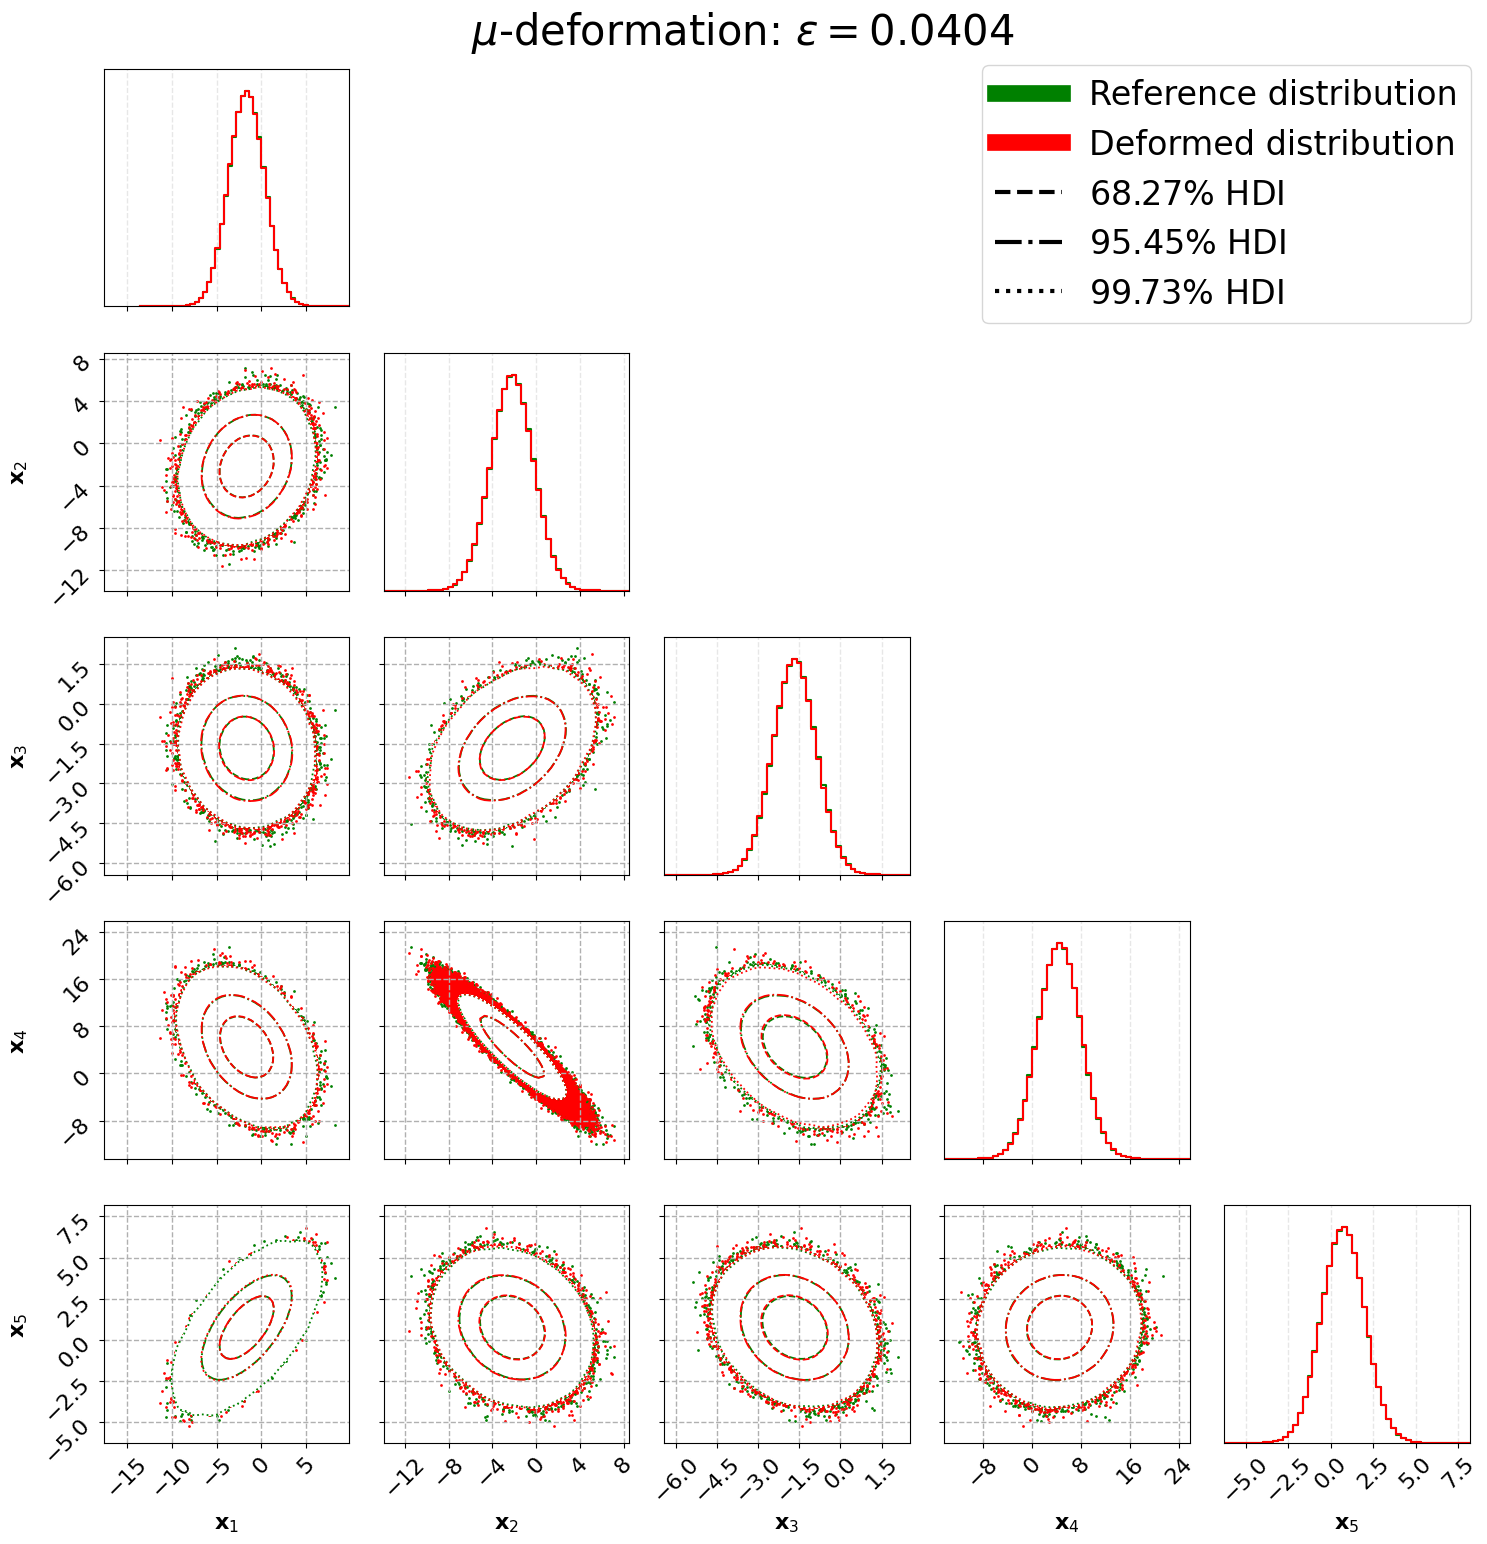

Plot done and saved in 41.54867712804116 s.


In [6]:
plot_corners(dist_1,
             dist_def_1,
             max_points = 1_000_000,
             max_dim = 32,
             n_bins = 50,
             w1 = None,
             w2 = None,
             sigma_contours = [1,2,3],
             show_intervals_1d = False,
             extend_range_percent = 20,
             title1 = None,
             title2 = None,
             color1 = "green",
             color2 = "red",
             plot_title = "$\mu$-deformation: $\epsilon = "+str(eps)+"$",
             title_kwargs = {"fontsize": 30, "y": 1.03},
             legend_labels = [r"Reference distribution",
                              r"Deformed distribution",
                              r'$68.27\%$ HDI',
                              r'$95.45\%$ HDI',
                              r'$99.73\%$ HDI'],
             legend_kwargs = {"fontsize": 24, "loc": (0.66,0.79)},
             figdir = results_dir,
             figname = "corner_plot_def_1.png",
             save = True,
             show = True)

In [7]:
# plot_corr_matrix_side_by_side(dist_1 = dist_1, 
#                               dist_2 = dist_def_1, 
#                               path_to_plots = results_dir, 
#                               figure_name = "corre_matrix_plot_def_1.pdf",
#                               max_points = 1_000_000,
#                               title = r"%s"%("$\mu$-deformation: $\epsilon = "+str(eps)+"$"),
#                               show_labels = True,
#                               show = True,
#                               save = True)

### 2 - $\Sigma_{ij}$-deformation

In [7]:
eps = input_values[1]
dist_def_2 = deformations.deformed_distribution(dist_1,
                                                eps = eps,
                                                deform_type = "cov_diag",
                                                seed = seed)
print(eps)

0.0167


Sampling from dist_1...
Sampling from dist_1 done in 0.04338483209721744 s.
Sampling from dist_2...
Sampling from dist_2 done in 0.05148108210414648 s.
Computing HPD intervals...
HPD intervals computed in 13.673509137006477 s.
Computing HPD quotas...
HPD quotas computed in 3.5483204449992627 s.
Plotting corner plot...


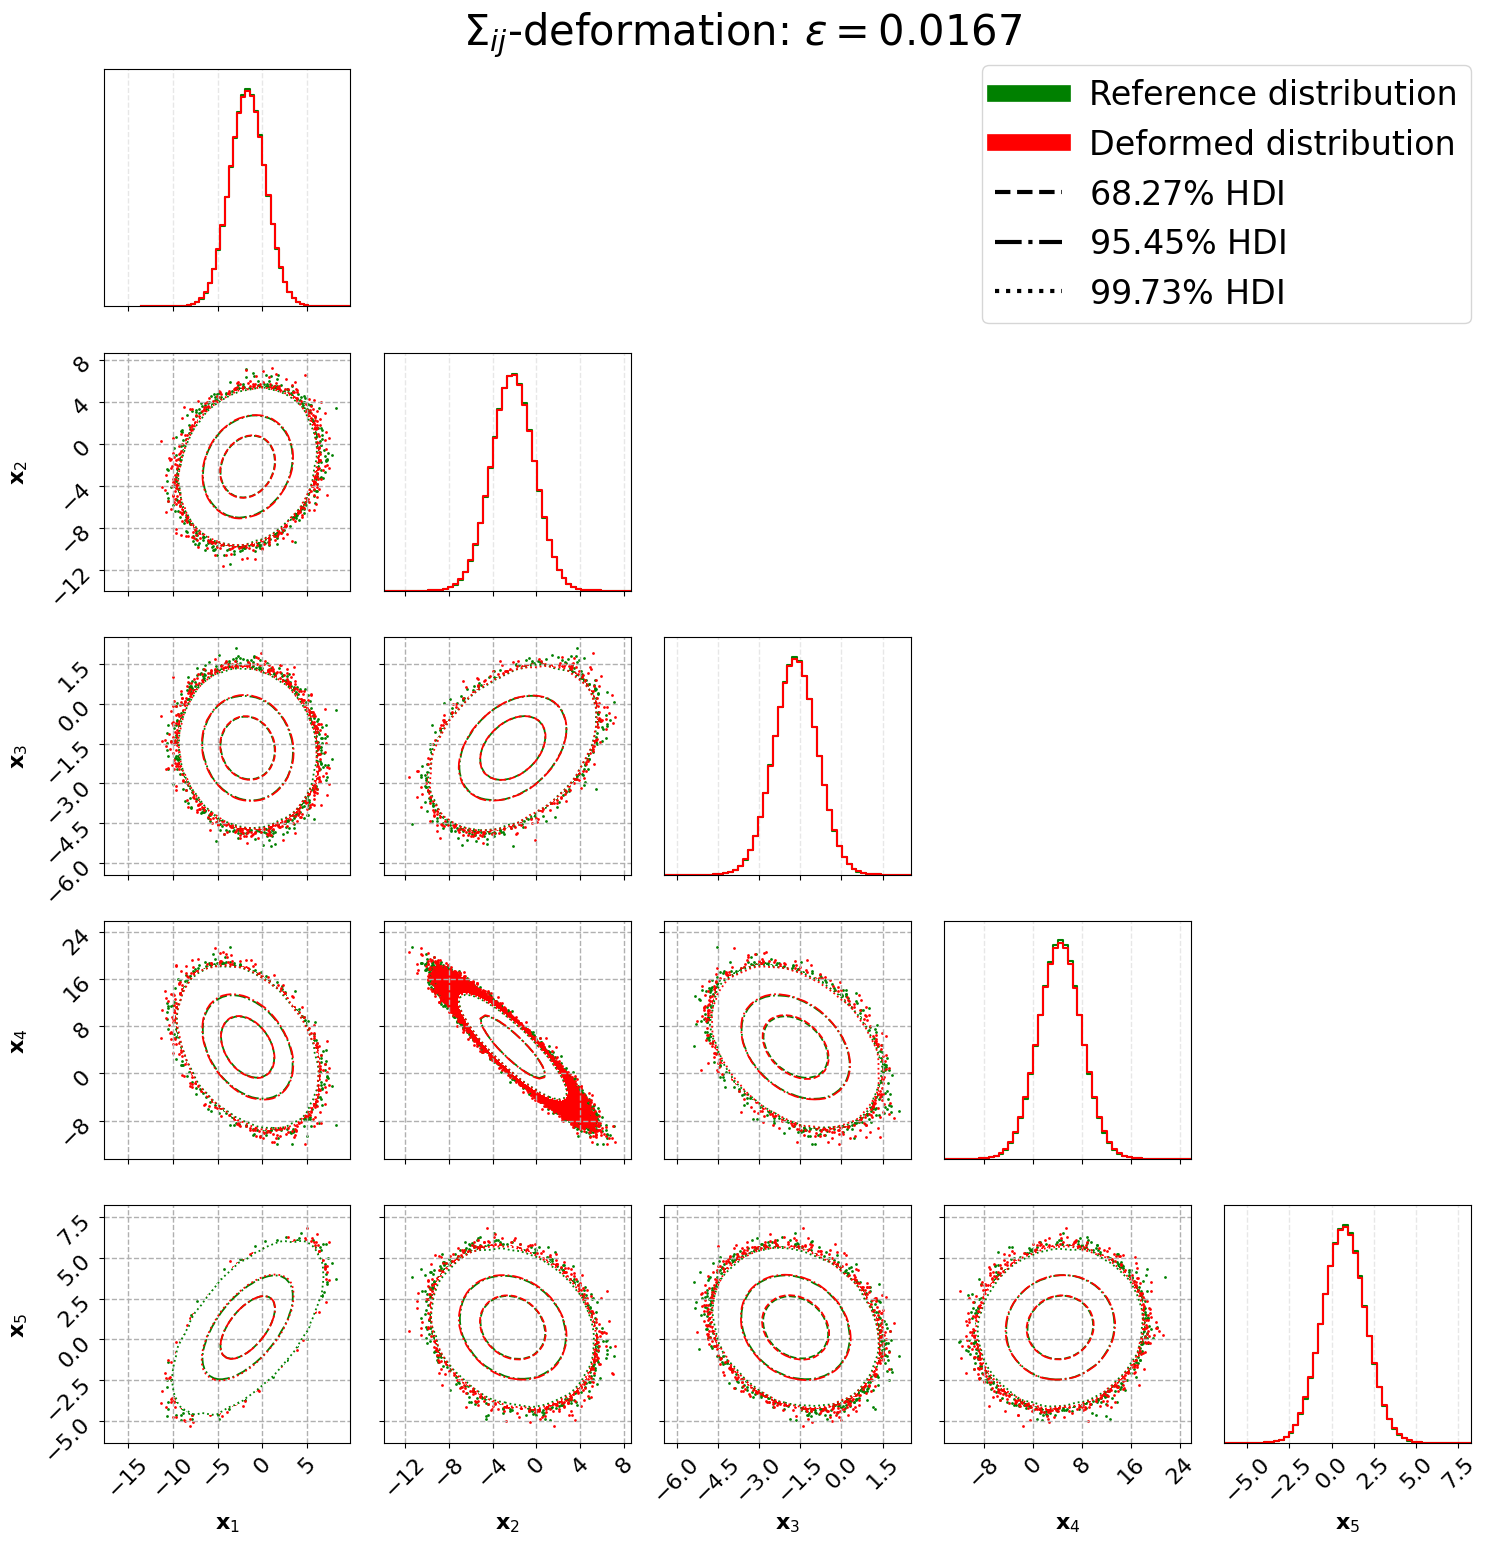

Plot done and saved in 41.42459547496401 s.


In [8]:
plot_corners(dist_1,
             dist_def_2,
             max_points = 1_000_000,
             max_dim = 32,
             n_bins = 50,
             w1 = None,
             w2 = None,
             sigma_contours = [1,2,3],
             show_intervals_1d = False,
             extend_range_percent = 20,
             title1 = None,
             title2 = None,
             color1 = "green",
             color2 = "red",
             plot_title = "$\Sigma_{ij}$-deformation: $\epsilon = "+str(eps)+"$",
             title_kwargs = {"fontsize": 30, "y": 1.03},
             legend_labels = [r"Reference distribution",
                              r"Deformed distribution",
                              r'$68.27\%$ HDI',
                              r'$95.45\%$ HDI',
                              r'$99.73\%$ HDI'],
             legend_kwargs = {"fontsize": 24, "loc": (0.66,0.79)},
             figdir = results_dir,
             figname = "corner_plot_def_2.png",
             save = True,
             show = True)

In [10]:
# plot_corr_matrix_side_by_side(dist_1 = dist_1, 
#                               dist_2 = dist_def_2, 
#                               path_to_plots = results_dir, 
#                               figure_name = "corre_matrix_plot_def_2.pdf",
#                               max_points = 1_000_000,
#                               title = r"%s"%("$\Sigma_{ij}$-deformation: $\epsilon = "+str(eps)+"$"),
#                               show_labels = True,
#                               show = True,
#                               save = True)

### 3 - $\Sigma_{i\neq j}$-deformation

In [9]:
eps = input_values[2]
dist_def_3 = deformations.deformed_distribution(dist_1,
                                                eps = eps,
                                                deform_type = "cov_off_diag",
                                                shuffle_type = "random",
                                                seed = seed)
print(eps)

0.038


Sampling from dist_1...
Sampling from dist_1 done in 0.042954361997544765 s.
Sampling from dist_2...
Sampling from dist_2 done in 0.08732204488478601 s.
Computing HPD intervals...
HPD intervals computed in 11.340300711104646 s.
Computing HPD quotas...
HPD quotas computed in 4.367243827087805 s.
Plotting corner plot...


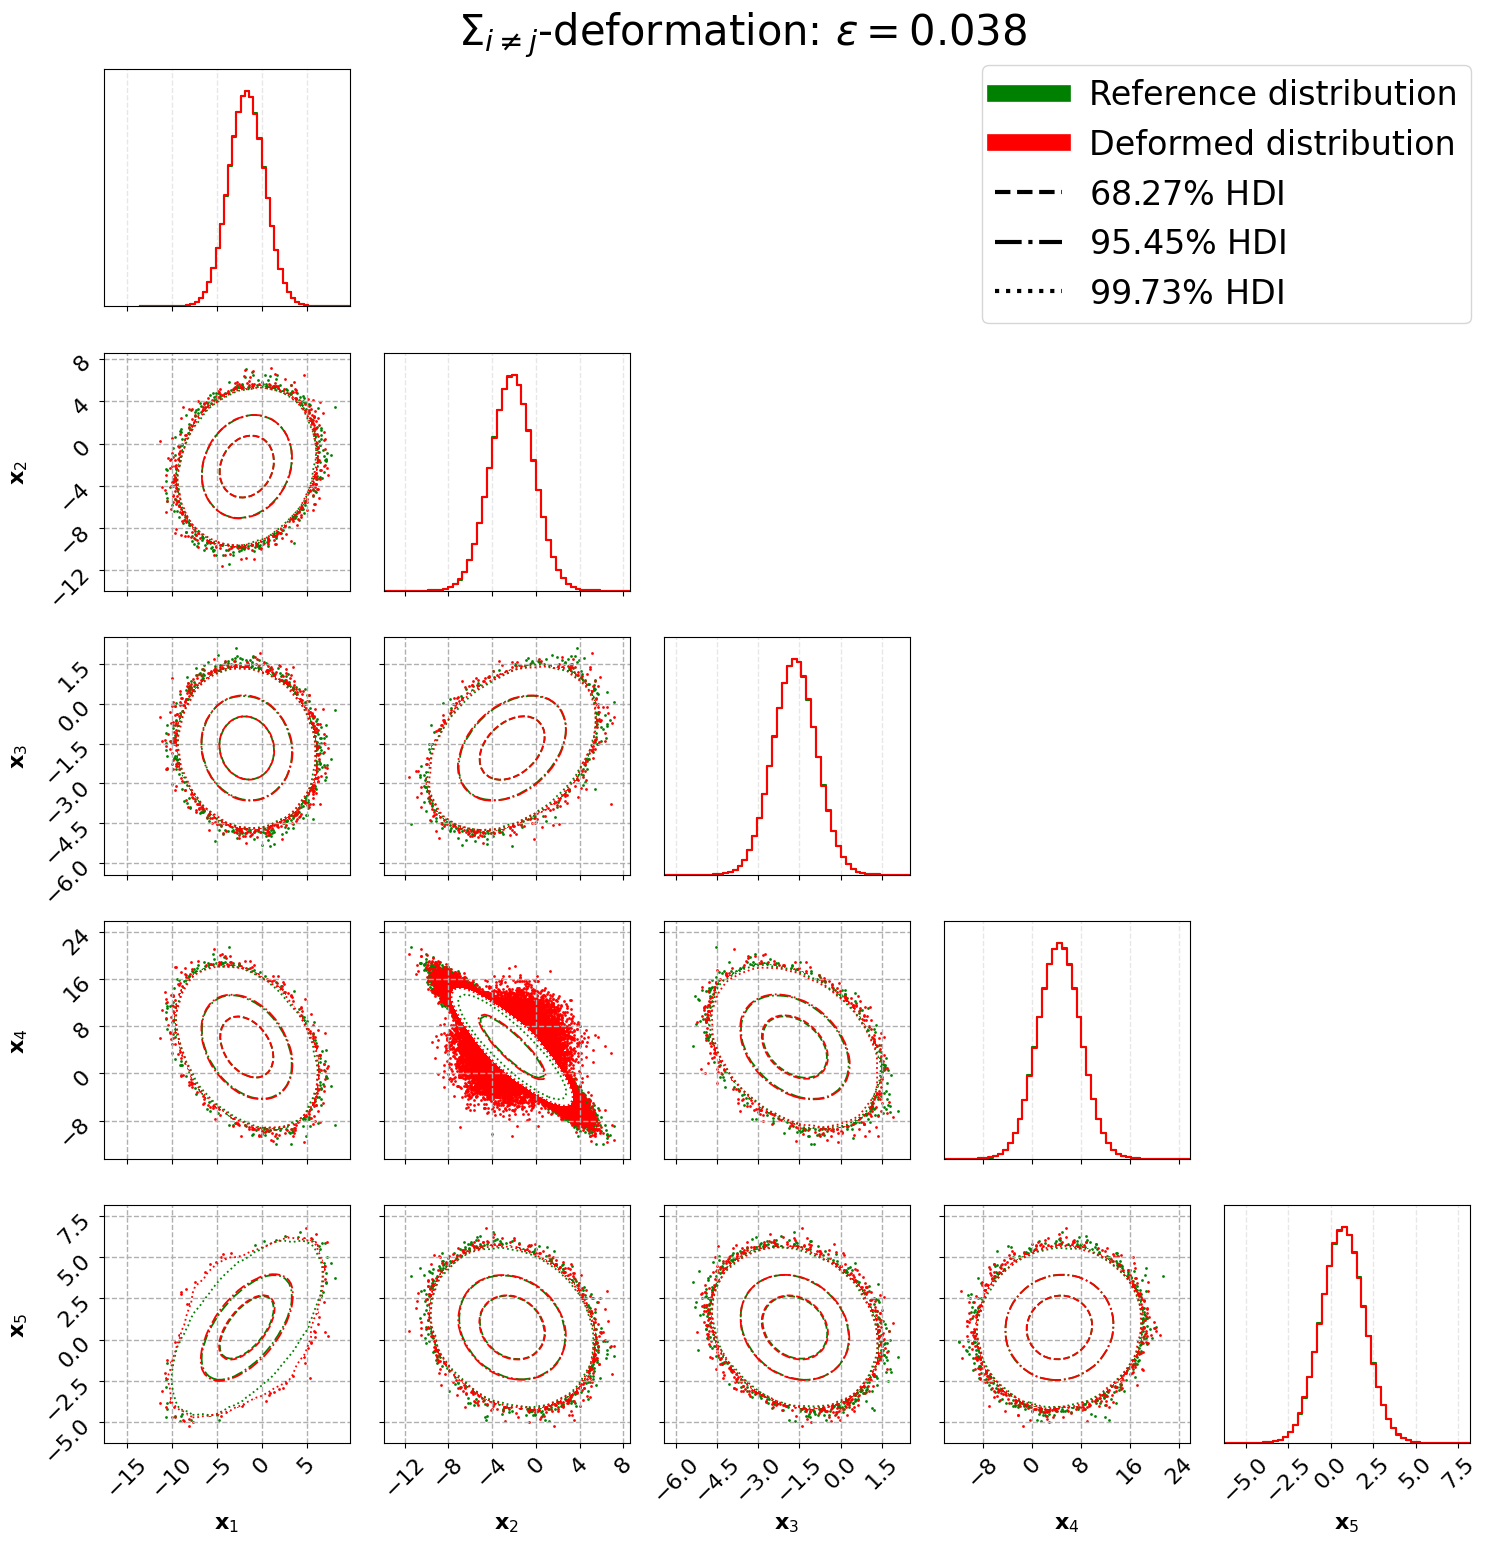

Plot done and saved in 39.94309735088609 s.


In [10]:
plot_corners(dist_1,
             dist_def_3,
             max_points = 1_000_000,
             max_dim = 32,
             n_bins = 50,
             w1 = None,
             w2 = None,
             sigma_contours = [1,2,3],
             show_intervals_1d = False,
             extend_range_percent = 20,
             title1 = None,
             title2 = None,
             color1 = "green",
             color2 = "red",
             plot_title = "$\Sigma_{i\\neq j}$-deformation: $\epsilon = "+str(eps)+"$",
             title_kwargs = {"fontsize": 30, "y": 1.03},
             legend_labels = [r"Reference distribution",
                              r"Deformed distribution",
                              r'$68.27\%$ HDI',
                              r'$95.45\%$ HDI',
                              r'$99.73\%$ HDI'],
             legend_kwargs = {"fontsize": 24, "loc": (0.66,0.79)},
             figdir = results_dir,
             figname = "corner_plot_def_3.png",
             save = True,
             show = True)

In [13]:
# plot_corr_matrix_side_by_side(dist_1 = dist_1, 
#                               dist_2 = dist_def_3, 
#                               path_to_plots = results_dir, 
#                               figure_name = "corre_matrix_plot_def_3.pdf",
#                               max_points = 1_000_000,
#                               title = r"%s"%("$\Sigma_{i\\neq j}$-deformation: $\epsilon = "+str(eps)+"$"),
#                               show_labels = True,
#                               show = True,
#                               save = True)

### 4 - pow$^{+}$-deformation

In [11]:
eps = input_values[3]
dist_def_4 = deformations.deformed_distribution(dist_1,
                                                eps = eps,
                                                deform_type = "power_abs",
                                                direction = "up")
print(eps)

0.0042


Sampling from dist_1...
Sampling from dist_1 done in 0.04339271201752126 s.
Sampling from dist_2...
Sampling from dist_2 done in 0.4070835669990629 s.
Computing HPD intervals...
HPD intervals computed in 11.281099320854992 s.
Computing HPD quotas...
HPD quotas computed in 4.376101272879168 s.
Plotting corner plot...


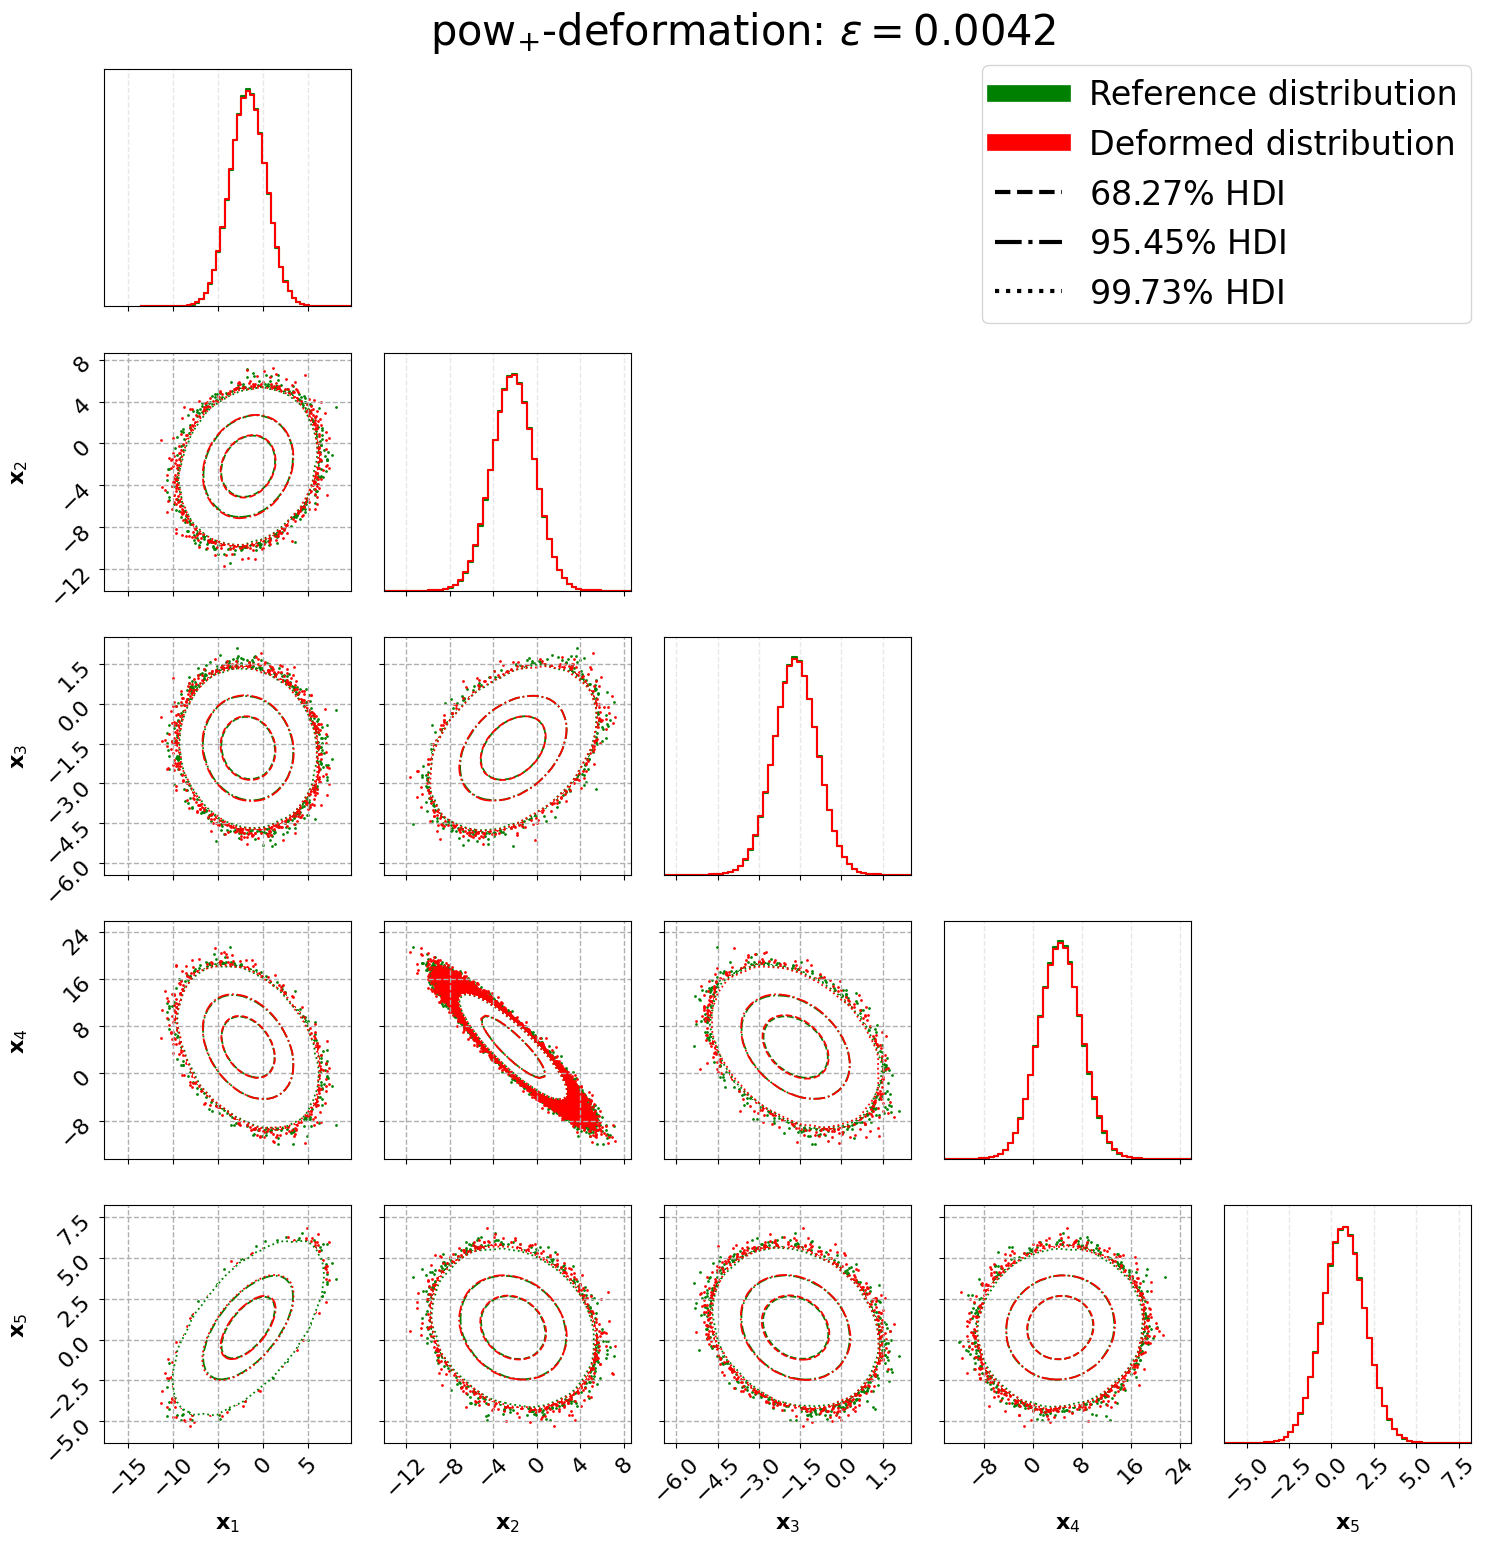

Plot done and saved in 40.47135089500807 s.


In [12]:
plot_corners(dist_1,
             dist_def_4,
             max_points = 1_000_000,
             max_dim = 32,
             n_bins = 50,
             w1 = None,
             w2 = None,
             sigma_contours = [1,2,3],
             show_intervals_1d = False,
             extend_range_percent = 20,
             title1 = None,
             title2 = None,
             color1 = "green",
             color2 = "red",
             plot_title = "$\\text{pow}_{+}$-deformation: $\epsilon = "+str(eps)+"$",
             title_kwargs = {"fontsize": 30, "y": 1.03},
             legend_labels = [r"Reference distribution",
                              r"Deformed distribution",
                              r'$68.27\%$ HDI',
                              r'$95.45\%$ HDI',
                              r'$99.73\%$ HDI'],
             legend_kwargs = {"fontsize": 24, "loc": (0.66,0.79)},
             figdir = results_dir,
             figname = "corner_plot_def_4.png",
             save = True,
             show = True)

In [16]:
# plot_corr_matrix_side_by_side(dist_1 = dist_1, 
#                               dist_2 = dist_def_4, 
#                               path_to_plots = results_dir, 
#                               figure_name = "corre_matrix_plot_def_4.pdf",
#                               max_points = 1_000_000,
#                               title = r"%s"%("$\#^{+}$-deformation: $\epsilon = "+str(eps)+"$"),
#                               show_labels = True,
#                               show = True,
#                               save = True)

### 5 - pow$^{-}$-deformation

In [13]:
eps = input_values[4]
dist_def_5 = deformations.deformed_distribution(dist_1,
                                                eps = eps,
                                                deform_type = "power_abs",
                                                direction = "down")

Sampling from dist_1...
Sampling from dist_1 done in 0.04723019804805517 s.
Sampling from dist_2...
Sampling from dist_2 done in 0.043332311091944575 s.
Computing HPD intervals...


HPD intervals computed in 11.863200586056337 s.
Computing HPD quotas...
HPD quotas computed in 4.263485805131495 s.
Plotting corner plot...


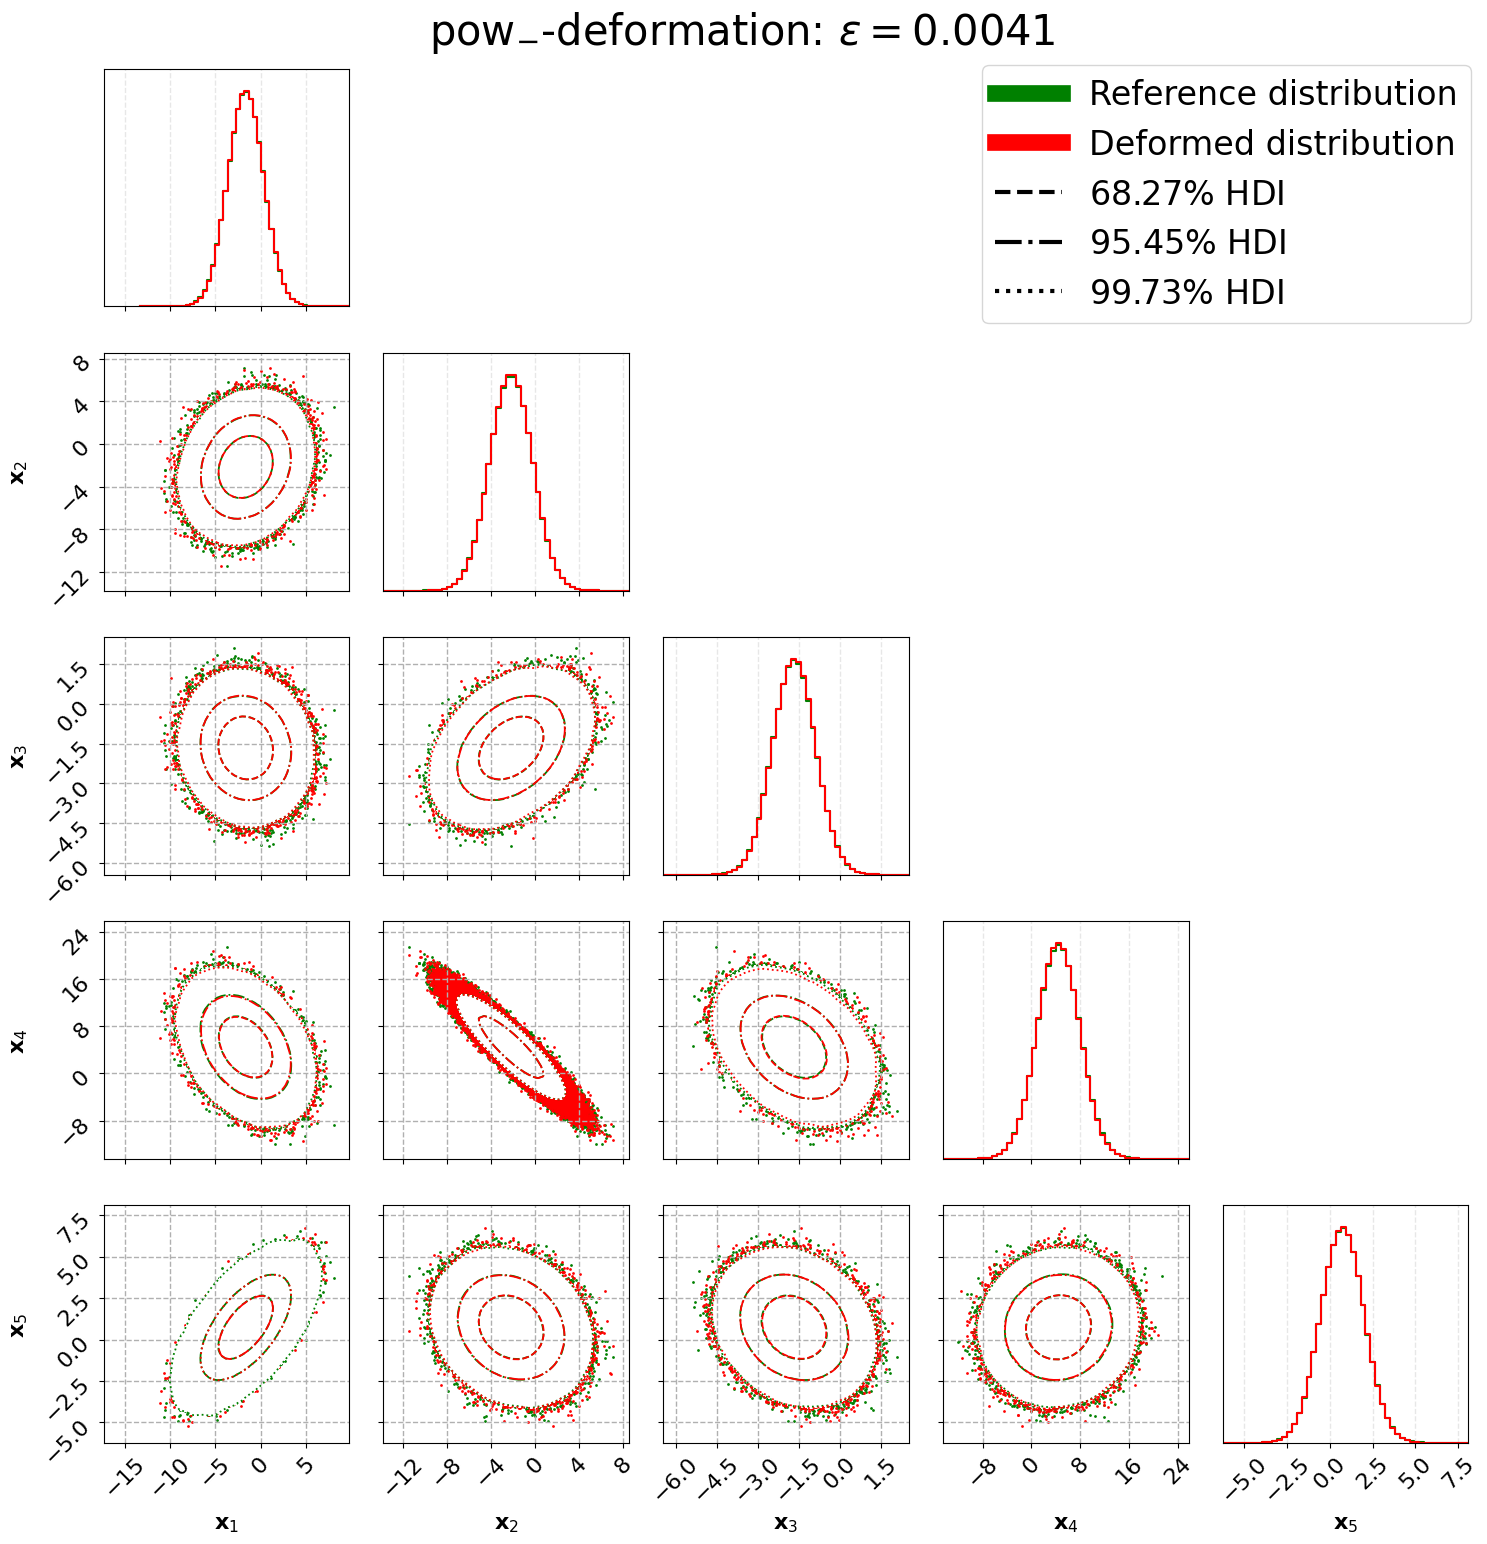

Plot done and saved in 40.117999378126115 s.


In [14]:
plot_corners(dist_1,
             dist_def_5,
             max_points = 1_000_000,
             max_dim = 32,
             n_bins = 50,
             w1 = None,
             w2 = None,
             sigma_contours = [1,2,3],
             show_intervals_1d = False,
             extend_range_percent = 20,
             title1 = None,
             title2 = None,
             color1 = "green",
             color2 = "red",
             plot_title = "$\\text{pow}_{-}$-deformation: $\epsilon = "+str(eps)+"$",
             title_kwargs = {"fontsize": 30, "y": 1.03},
             legend_labels = [r"Reference distribution",
                              r"Deformed distribution",
                              r'$68.27\%$ HDI',
                              r'$95.45\%$ HDI',
                              r'$99.73\%$ HDI'],
             legend_kwargs = {"fontsize": 24, "loc": (0.66,0.79)},
             figdir = results_dir,
             figname = "corner_plot_def_5.png",
             save = True,
             show = True)

In [19]:
# plot_corr_matrix_side_by_side(dist_1 = dist_1, 
#                               dist_2 = dist_def_5, 
#                               path_to_plots = results_dir, 
#                               figure_name = "corre_matrix_plot_def_5.pdf",
#                               max_points = 1_000_000,
#                               title = r"%s"%("$\#^{-}$-deformation: $\epsilon = "+str(eps)+"$"),
#                               show_labels = True,
#                               show = True,
#                               save = True)

### 6 - $\mathcal{N}$-deformation

In [15]:
eps = input_values[5]
dist_def_6 = deformations.deformed_distribution(dist_1,
                                                eps = eps,
                                                deform_type = "random",
                                                shift_dist = "normal",
                                                seed = seed)
print(eps)

0.2537


Sampling from dist_1...
Sampling from dist_1 done in 0.04725249484181404 s.
Sampling from dist_2...
Sampling from dist_2 done in 0.04366815113462508 s.
Computing HPD intervals...
HPD intervals computed in 11.975280147977173 s.
Computing HPD quotas...
HPD quotas computed in 3.562639156822115 s.
Plotting corner plot...


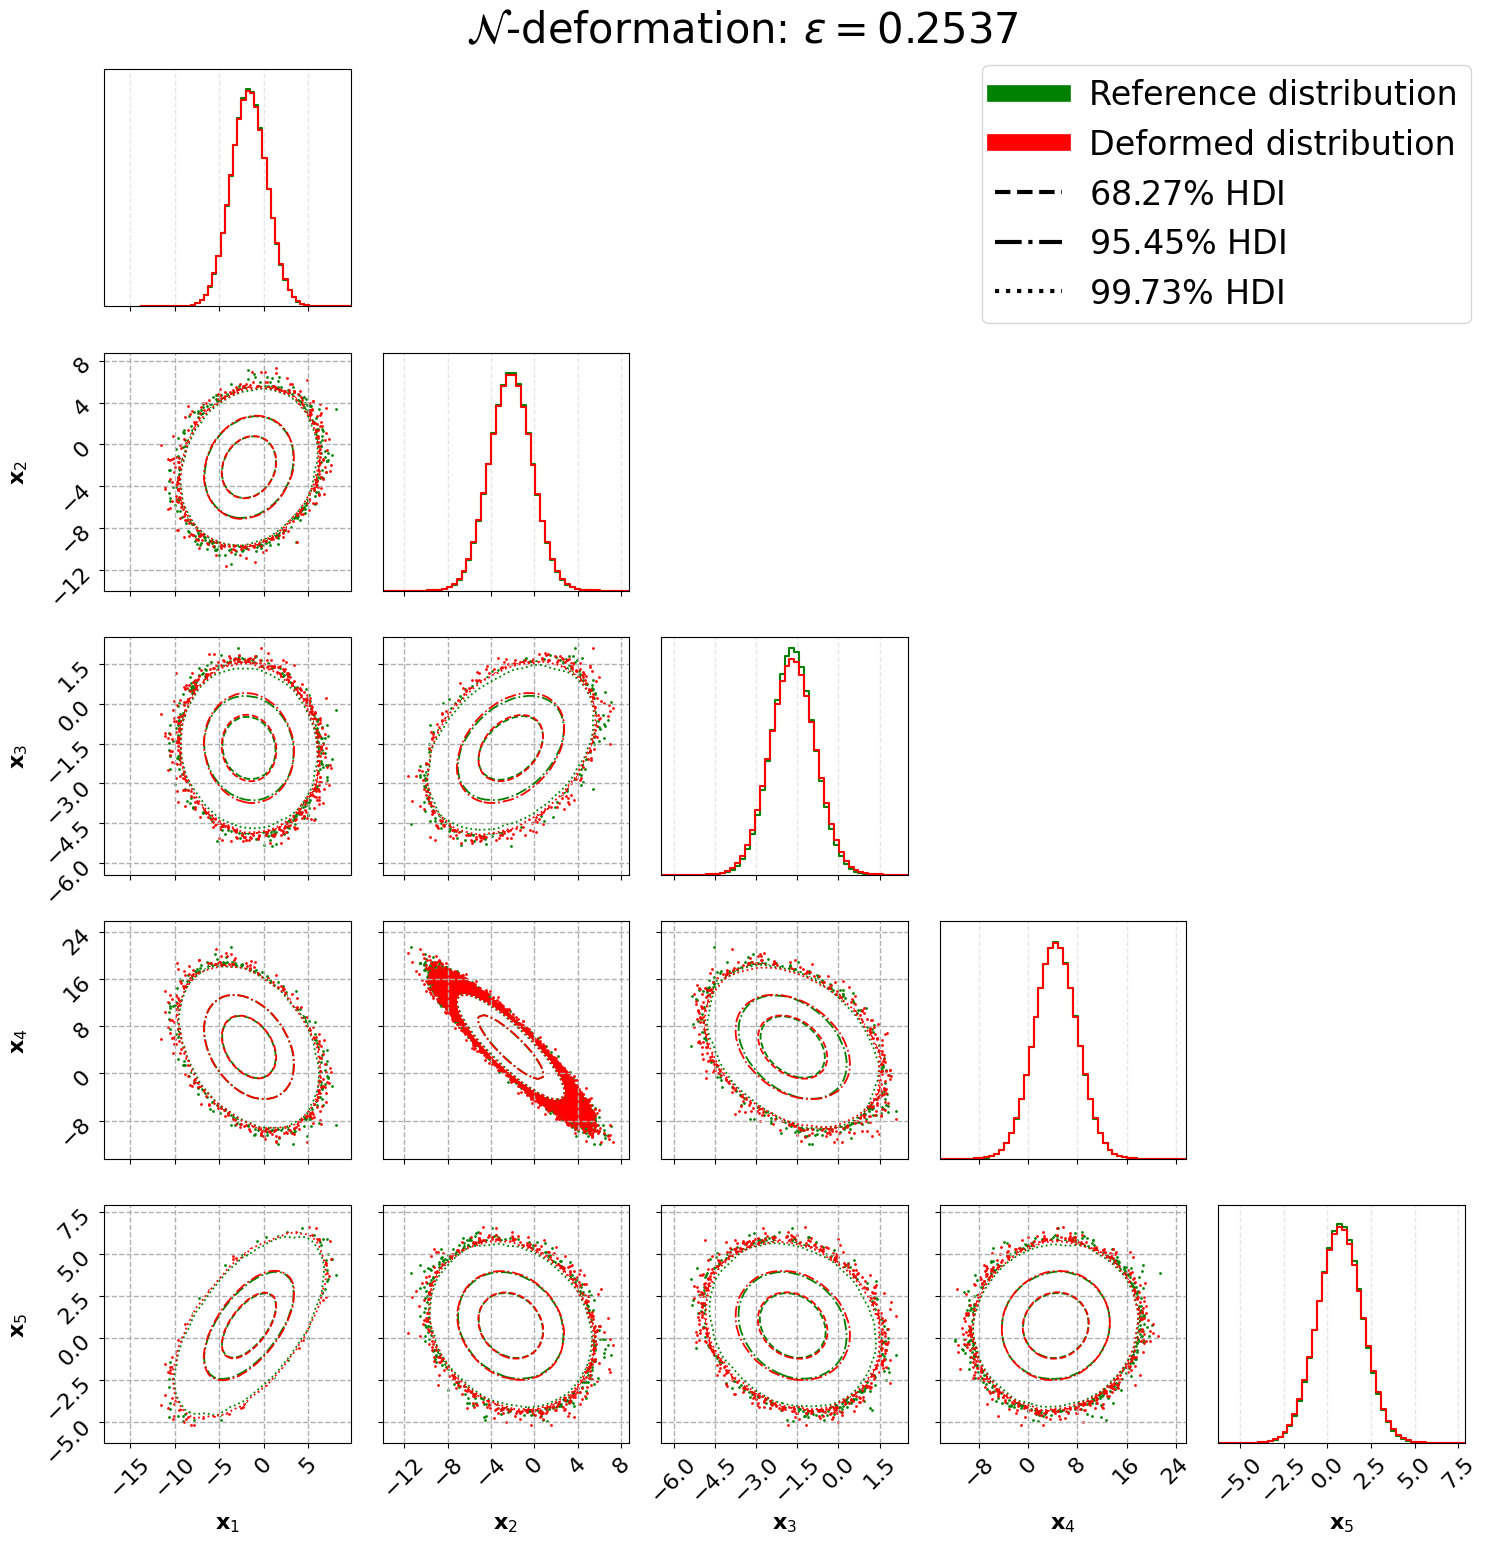

Plot done and saved in 39.56420036009513 s.


In [16]:
plot_corners(dist_1,
             dist_def_6,
             max_points = 1_000_000,
             max_dim = 32,
             n_bins = 50,
             w1 = None,
             w2 = None,
             sigma_contours = [1,2,3],
             show_intervals_1d = False,
             extend_range_percent = 20,
             title1 = None,
             title2 = None,
             color1 = "green",
             color2 = "red",
             plot_title = "$\mathcal{N}$-deformation: $\epsilon = "+str(eps)+"$",
             title_kwargs = {"fontsize": 30, "y": 1.03},
             legend_labels = [r"Reference distribution",
                              r"Deformed distribution",
                              r'$68.27\%$ HDI',
                              r'$95.45\%$ HDI',
                              r'$99.73\%$ HDI'],
             legend_kwargs = {"fontsize": 24, "loc": (0.66,0.79)},
             figdir = results_dir,
             figname = "corner_plot_def_6.png",
             save = True,
             show = True)

In [22]:
# plot_corr_matrix_side_by_side(dist_1 = dist_1, 
#                               dist_2 = dist_def_6, 
#                               path_to_plots = results_dir, 
#                               figure_name = "corre_matrix_plot_def_6.pdf",
#                               max_points = 1_000_000,
#                               title = r"%s"%("$\mathcal{N}$-deformation: $\epsilon = "+str(eps)+"$"),
#                               show_labels = True,
#                               show = True,
#                               save = True)

### 7 - $\mathcal{U}$-deformation

In [17]:
eps = input_values[6]
dist_def_7 = deformations.deformed_distribution(dist_1,
                                                eps = eps,
                                                deform_type = "random",
                                                shift_dist = "uniform",
                                                seed = seed)
print(eps)

0.44


Sampling from dist_1...
Sampling from dist_1 done in 0.04748706100508571 s.
Sampling from dist_2...
Sampling from dist_2 done in 0.04553473484702408 s.
Computing HPD intervals...
HPD intervals computed in 10.836094341007993 s.
Computing HPD quotas...
HPD quotas computed in 3.588178545003757 s.
Plotting corner plot...


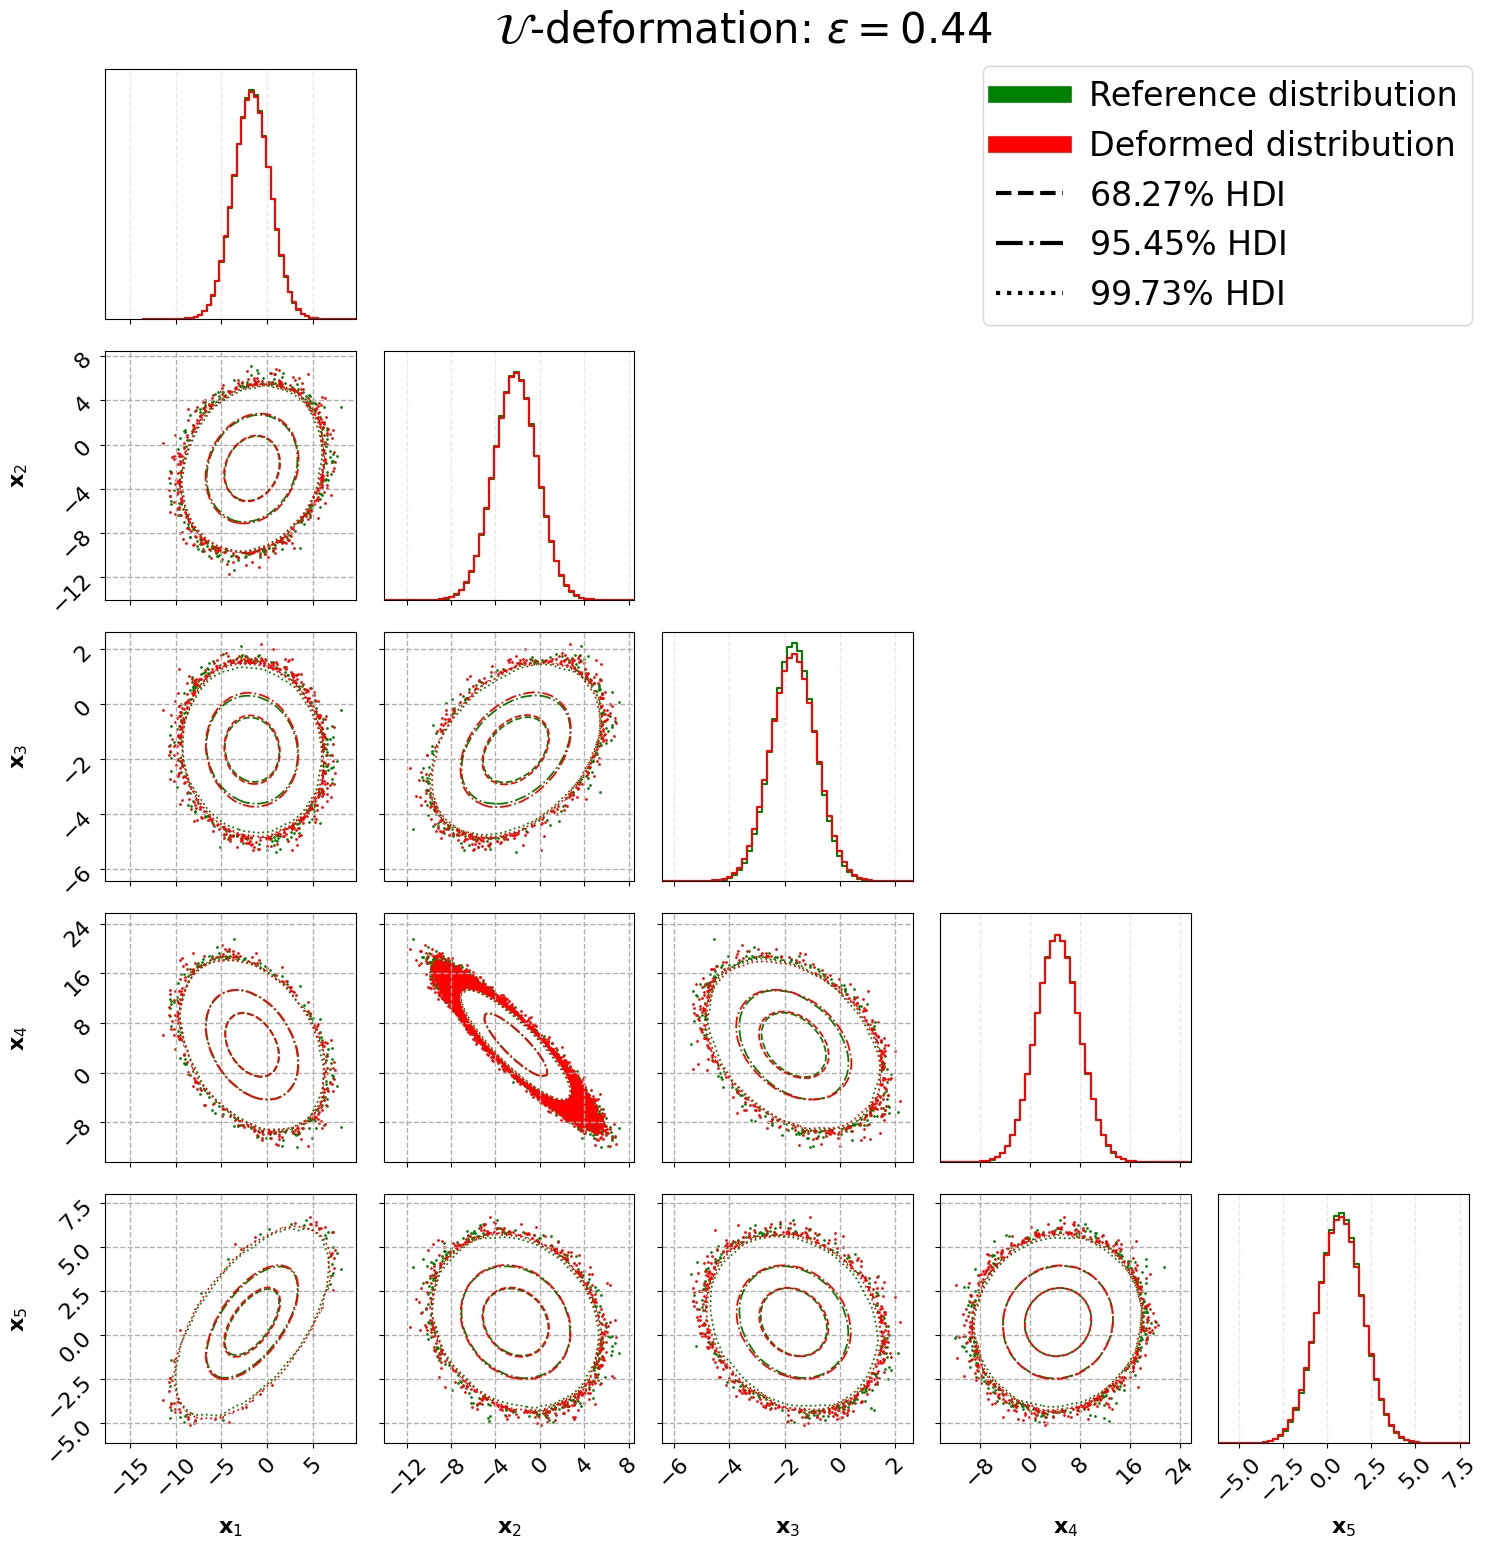

Plot done and saved in 38.77336400607601 s.


In [18]:
plot_corners(dist_1,
             dist_def_7,
             max_points = 1_000_000,
             max_dim = 32,
             n_bins = 50,
             w1 = None,
             w2 = None,
             sigma_contours = [1,2,3],
             show_intervals_1d = False,
             extend_range_percent = 20,
             title1 = None,
             title2 = None,
             color1 = "green",
             color2 = "red",
             plot_title = "$\mathcal{U}$-deformation: $\epsilon = "+str(eps)+"$",
             title_kwargs = {"fontsize": 30, "y": 1.03},
             legend_labels = [r"Reference distribution",
                              r"Deformed distribution",
                              r'$68.27\%$ HDI',
                              r'$95.45\%$ HDI',
                              r'$99.73\%$ HDI'],
             legend_kwargs = {"fontsize": 24, "loc": (0.66,0.79)},
             figdir = results_dir,
             figname = "corner_plot_def_7.png",
             save = True,
             show = True)

In [25]:
# plot_corr_matrix_side_by_side(dist_1 = dist_1, 
#                               dist_2 = dist_def_7, 
#                               path_to_plots = results_dir, 
#                               figure_name = "corre_matrix_plot_def_7.pdf",
#                               max_points = 1_000_000,
#                               title = r"%s"%("$\mathcal{U}$-deformation: $\epsilon = "+str(eps)+"$"),
#                               show_labels = True,
#                               show = True,
#                               save = True)